# Определение перспективного проекта для телеком-компании</b>
 <b> Описание исследования </b>

 Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

<b>Цель исследования</b>

 Нам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В нашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. 
 
<b> Задачи исследования</b>

Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

<b>Данное исследование разделим на несколько частей:</b>

[ <b>1. Изучение общей информации.</b>](#step_1)

  
<b> 2. Предобработка данных:</b>
 
 [ Приведение данные к нужным типам.](#step_3)
  
 2.3. Произведем подсчет для кадого пользователя:
  
  [- количество сделанных звонков и израсходованных минут разговора по месяцам.](#step_5)
 
  [- количество отправленных сообщений по месяцам.](#step_6)
  
  [- объем израсходованного интернет-трафика по месяцам.](#step_7)
  
  [- помесячную выручку с каждого пользователя (вычтем бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножем на значение из тарифного плана; прибавим абонентскую плату, соответствующую тарифному плану).](#step_8)
  
<b> 3. Анализ данных. Опишем поведение клиентов оператора, исходя из выборки</b>
 
 [3.1. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц.](#step_9)
 
 [3.2. Посчитаем среднее количество, дисперсию и стандартное отклонение.](#step_10)
   
 [3.3. Построим гистограммы.](#step_11)
    
 [3.4. Опишием распределения.](#step_12)
  
<b> 4. Проверка гипотез </b>
  
 [4.1. средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.](#step_13)
  
 [4.2. средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.](#step_14)
 
 [4.3. Пояснение как я формулировал нулевую и альтернативную гипотезы.](#step_15)
  
 [4.4. Пояснение какой критерий использовали для проверки гипотез и почему.](#step_16)
  
  
 <b> 5.</b> [<b>Общий вывод </b>](#step_17)

<a id="step_1"></a>
<b>1. Изучение общей информации.</b>

In [1]:
import pandas as pd #подключем библиотеку 'pandas' для работы с файлами
import numpy as np #подключем библиотеку 'numpy' для работы с математическими функциями и массивами
import matplotlib.pyplot as plt #подключем библиотеку 'matplotlib.pyplot' для построения графиков
import seaborn as sns #подгружаем библиотеку seaborn для визуализации
from scipy import stats as st #подключаем модуль 'stats' из библиотеки 'scipy' для статистики

calls = pd.read_csv ('/datasets/calls.csv') #считываем значения файла 'calls.csv' в датафрейм 'calls'
internet = pd.read_csv ('/datasets/internet.csv') #считываем значения файла 'internet.csv' в датафрейм 'internet'
messages = pd.read_csv ('/datasets/messages.csv') #считываем значения файла 'messages.csv' в датафрейм 'messages.csv'
tariffs = pd.read_csv ('/datasets/tariffs.csv') #считываем значения файла 'tariffs.csv' в датафрейм 'tariffs'
users = pd.read_csv ('/datasets/users.csv') #считываем значения файла 'users.csv' в датафрейм 'users'

In [2]:
#функция проверки первичных данных
def files_info (file):
    file.info ()
    display (file.head (10))

In [3]:
files_info (calls)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


<b>Таблица calls (информация о звонках):</b>

•	id — уникальный номер звонка

•	call_date — дата звонка

•	duration — длительность звонка в минутах

•	user_id — идентификатор пользователя, сделавшего звонок

Фаил 'calls.csv' содержит 202 607 строк. В колонке 'duration' есть звонки продолжительностью '0' минут, как следует из описания к файлу - это пропущнные звонки.

Пропущенных значений не выявлено.

In [4]:
files_info (internet)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


<b>Таблица internet (информация об интернет-сессиях):</b>
    
•	id — уникальный номер сессии

•	mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)

•	session_date — дата интернет-сессии

•	user_id — идентификатор пользователя

Фаил 'internet.csv' содержит 149 396 строк.

Пропущенных значений не выявлено.

In [5]:
files_info (messages)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


<b>Таблица messages (информация о сообщениях):</b>

•	id — уникальный номер сообщения

•	message_date — дата сообщения

•	user_id — идентификатор пользователя, отправившего сообщение

Фаил 'messages.csv' содержит 123 036 строк.

Пропущенных значений не выявлено.

In [6]:
files_info (tariffs)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<b>Таблица tariffs (информация о тарифах):</b>

•	tariff_name — название тарифа

•	rub_monthly_fee — ежемесячная абонентская плата в рублях

•	minutes_included — количество минут разговора в месяц, включённых в абонентскую плату

•	messages_included — количество сообщений в месяц, включённых в абонентскую плату

•	mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)

•	rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)

•	rub_per_message — стоимость отправки сообщения сверх тарифного пакета

•	rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

Фаил 'tariffs.csv' содержит 2 строки. В нем расписаны два тарифных плана с их ограничениями и стоимостями.

Пропущенных значений не выявлено.

In [7]:
files_info (users)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


<b>Таблица users (информация о пользователях):</b>

•	user_id — уникальный идентификатор пользователя

•	first_name — имя пользователя

•	last_name — фамилия пользователя

•	age — возраст пользователя (годы)

•	reg_date — дата подключения тарифа (день, месяц, год)

•	churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)

•	city — город проживания пользователя

•	tarif — название тарифного плана

Фаил 'users.csv' содержит 500 строк.

Пропущенные значения только в поле 'churn_date', что соответствует, по описанию, тариф ещё действовал на момент выгрузки данных

<a id="step_3"></a>
<b> 2. Предобработка данных:</b>
 
<b>Приведение данные к нужным типам.</b>

In [8]:
#удалим строки с недозвонами
calls = calls.query ('duration > 0')

#приведем даты к соотвествующему типу данных
calls ['call_date'] = pd.to_datetime (calls ['call_date'], format='%Y-%m-%d')

#округлим значения времени звонков вверх
calls ['duration'] = np.ceil (calls ['duration'])

#создадим доп столбец с месяцем
calls ['month'] = pd.DatetimeIndex (calls ['call_date']).month

In [9]:
#приведем даты к соотвествующему типу данных
internet ['session_date'] = pd.to_datetime (internet ['session_date'], format='%Y-%m-%d')

#округлим значения интернет-траффика вверх
internet ['mb_used'] = np.ceil (internet ['mb_used'])

#создадим доп столбец с месяцем
internet ['month'] = pd.DatetimeIndex (internet ['session_date']).month

In [10]:
#изменим тип данных в user_id - приведём его к int
messages ['user_id'] = messages ['user_id'].astype ('int')

#приведем даты к соотвествующему типу данных
messages ['message_date'] = pd.to_datetime (messages ['message_date'], format='%Y-%m-%d')

#создадим доп столбец с месяцем
messages ['month'] = pd.DatetimeIndex (messages ['message_date']).month

In [11]:
#приведем даты в столбцах churn_date и reg_date к соответствующим форматам
users ['reg_date'] = pd.to_datetime (users ['reg_date'], format='%Y-%m-%d')
users ['churn_date'] = pd.to_datetime (users ['churn_date'], format='%Y-%m-%d')
users ['month'] = pd.DatetimeIndex (users ['reg_date']).month

<b> 2.3. Произведем подсчет для кадого пользователя:</b>
<a id="step_5"></a>
<b>  - количество сделанных звонков и израсходованных минут разговора по месяцам.</b>

In [12]:
#количество соверщенных звонков по месяцам
calls_count_by_month = calls.pivot_table (index = 'user_id', values = 'duration', columns = 'month', aggfunc = 'count')

#количество минут разговоров по месяцам
calls_sum_by_month = calls.pivot_table (index = ['month', 'user_id'], values = 'duration', aggfunc = 'sum')

<a id="step_6"></a>
<b>- количество отправленных сообщений по месяцам.</b>

In [13]:
messages_count_by_month = messages.pivot_table (index = ['month', 'user_id'], values = 'message_date', aggfunc = 'count')

<a id="step_7"></a>
<b>- объем израсходованного интернет-трафика по месяцам.</b>

In [14]:
internet_sum_by_month = internet.pivot_table (index = ['month', 'user_id'], values = 'mb_used', aggfunc = 'sum')

<a id="step_8"></a>
<b>- помесячную выручку с каждого пользователя (вычтем бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножем на значение из тарифного плана; прибавим абонентскую плату, соответствующую тарифному плану).</b>

In [15]:
#объединяю таблицу звонки и сообщения 
group_all = messages_count_by_month.merge (calls_sum_by_month, on = ['user_id', 'month'], how='outer')

#объединяю таблицу звонки, сообщения и интернет
group_all = group_all.merge (internet_sum_by_month, on = ['user_id', 'month'], how='outer')

#объединяю таблицу звонки, сообщения, интернет и информация о пользователях
group_all = group_all.merge (users, on = ['user_id', 'month'], how='outer')

#заменим все пропущенные значения на '0'
group_all=group_all.fillna(0).sort_values(by='user_id')
display (group_all.head (10))

,user_id,month,message_date,duration,mb_used,age,churn_date,city,first_name,last_name,reg_date,tariff
333,1000,5,22.0,159.0,2256.0,52.0,0,Краснодар,Рафаил,Верещагин,2018-05-25 00:00:00,ultra
507,1000,6,60.0,172.0,23257.0,0.0,0,0,0,0,0,0
2313,1000,12,70.0,333.0,9827.0,0.0,0,0,0,0,0,0
1930,1000,11,58.0,338.0,14768.0,0.0,0,0,0,0,0,0
716,1000,7,75.0,340.0,14016.0,0.0,0,0,0,0,0,0
1573,1000,10,73.0,350.0,14717.0,0.0,0,0,0,0,0,0
1255,1000,9,57.0,466.0,14581.0,0.0,0,0,0,0,0,0
963,1000,8,81.0,408.0,14070.0,0.0,0,0,0,0,0,0
3140,1001,12,0.0,414.0,14053.0,0.0,0,0,0,0,0,0
3073,1001,11,0.0,430.0,18452.0,41.0,0,Москва,Иван,Ежов,2018-11-01 00:00:00,smart


In [16]:
group_all.shape

(3216, 12)

In [34]:
group_all.user_id.nunique()

500

In [17]:
#функция посчета выручки в зависимости от тарифа

def sum_total (row):
    
    messages = row ['message_date']
    calls = row ['duration']
    internet = row ['mb_used']
    tariff = row ['tariff']
    
#выбор строки условий согласно тарифу    
    if (tariff == 'smart'):
        string = 0
    else:
        string = 1
#считаем затраты на звонки согласно тарифу        
    per_calls = calls - tariffs ['minutes_included'][string]
    if per_calls > 0:
        total_for_calls = per_calls * tariffs ['rub_per_minute'][string]
    else:
        total_for_calls = 0
#считаем затраты на интернет согласно тарифу         
    per_internet = internet - tariffs ['mb_per_month_included'][string]
    if per_internet > 0:
        total_for_internet = round ((per_internet / 1024)) * tariffs ['rub_per_gb'][string]
    else:
        total_for_internet = 0
#считаем затраты на сообщения согласно тарифу            
    per_messages = messages - tariffs ['messages_included'][string]
    if per_messages > 0:
        total_for_messages = per_messages * tariffs ['rub_per_message'][string]
    else:
        total_for_messages = 0
#считаем общие затраты согласно тарифу            
    total = total_for_calls + total_for_internet + total_for_messages + tariffs ['rub_monthly_fee'][string]
    return total

In [18]:
#расчитываем выручку и добавляем в новый столбец
group_all ['total'] = group_all.apply (sum_total, axis = 1)
display (group_all.head (10))

,user_id,month,message_date,duration,mb_used,age,churn_date,city,first_name,last_name,reg_date,tariff,total
333,1000,5,22.0,159.0,2256.0,52.0,0,Краснодар,Рафаил,Верещагин,2018-05-25 00:00:00,ultra,1950.0
507,1000,6,60.0,172.0,23257.0,0.0,0,0,0,0,0,0,1950.0
2313,1000,12,70.0,333.0,9827.0,0.0,0,0,0,0,0,0,1950.0
1930,1000,11,58.0,338.0,14768.0,0.0,0,0,0,0,0,0,1950.0
716,1000,7,75.0,340.0,14016.0,0.0,0,0,0,0,0,0,1950.0
1573,1000,10,73.0,350.0,14717.0,0.0,0,0,0,0,0,0,1950.0
1255,1000,9,57.0,466.0,14581.0,0.0,0,0,0,0,0,0,1950.0
963,1000,8,81.0,408.0,14070.0,0.0,0,0,0,0,0,0,1950.0
3140,1001,12,0.0,414.0,14053.0,0.0,0,0,0,0,0,0,1950.0
3073,1001,11,0.0,430.0,18452.0,41.0,0,Москва,Иван,Ежов,2018-11-01 00:00:00,smart,1150.0


In [41]:
final_df_test = group_all.merge(
    users[['user_id', 'tariff']],
    on='user_id',
    how='left',
    suffixes=("_original","_test")
)

In [42]:
final_df_test.shape

(3216, 14)

In [45]:
final_df_test = final_df_test.merge(
    tariffs,
    left_on='tariff_test',
    right_on='tariff_name',
    how='left'
)

In [54]:
final_df_test['over_minutes'] =  final_df_test['duration'] - final_df_test['minutes_included']
final_df_test['over_sms'] =  final_df_test['message_date'] - final_df_test['messages_included']
final_df_test['over_mb'] = final_df_test['mb_used'] - final_df_test['mb_per_month_included']

In [55]:
# заменяем отрицательные значения на нули
for col in ['over_minutes', 'over_sms', 'over_mb']:
    final_df_test.loc[(final_df_test[col] < 0), col] = 0

In [59]:
final_df_test['over_gb'] = np.ceil(final_df_test['over_mb'] / 1024)

In [61]:
final_df_test['over_gb_rub'] = final_df_test['over_gb'] * final_df_test['rub_per_gb']
final_df_test['over_minutes_rub'] = final_df_test['over_minutes'] * final_df_test['rub_per_minute']
final_df_test['over_sms_rub'] = final_df_test['over_sms'] * final_df_test['rub_per_message']

In [62]:
final_df_test['over_revenue'] = final_df_test[['over_gb_rub', 'over_minutes_rub', 'over_sms_rub']].sum(axis=1)

In [63]:
final_df_test['total_revenue'] = final_df_test['over_revenue'] + final_df_test['rub_monthly_fee']

In [65]:
final_df_test['total_revenue'].describe()

count    3216.000000
mean     1532.416356
std       799.624368
min       550.000000
25%       750.000000
50%      1667.500000
75%      1950.000000
max      6770.000000
Name: total_revenue, dtype: float64

In [19]:
group_all ['total'].describe()

count    3216.000000
mean     1847.634017
std       473.457074
min       550.000000
25%      1950.000000
50%      1950.000000
75%      1950.000000
max      4800.000000
Name: total, dtype: float64

<b> 3. Анализ данных. Опишем поведение клиентов оператора, исходя из выборки</b>

<a id="step_9"></a>
<b>3.1. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц.</b>

In [20]:
#сделаем таблицу с интересующими нас значениями для пользователей тарифа 'smart'
tariff_smart = (group_all
     .query ('tariff == "smart"')
     .pivot_table (index = 'month', values = ('duration', 'message_date', 'mb_used', 'total'), aggfunc = 'sum')
)                
#сделаем таблицу с интересующими нас значениями для пользователей тарифа 'ultra'
tariff_ultra = (group_all
     .query ('tariff == "ultra"')
     .pivot_table (index = 'month', values = ('duration', 'message_date', 'mb_used', 'total'), aggfunc = 'sum')
)
display (tariff_smart.head (10))
display (tariff_ultra.head (10))

,duration,mb_used,message_date,total
month,,,,
1,6931.0,289831.0,620.0,23925.0
2,4035.0,163193.0,312.0,13353.0
3,5046.0,188427.0,400.0,13111.0
4,8096.0,276383.0,739.0,20052.0
5,5658.0,275657.0,514.0,21411.0
6,4275.0,189244.0,314.0,13119.0
7,8921.0,326184.0,671.0,24150.0
8,7246.0,329359.0,577.0,20878.0
9,6814.0,242056.0,549.0,16191.0


,duration,mb_used,message_date,total
month,,,,
1,3853.0,118382.0,304.0,17550.0
2,1874.0,117389.0,181.0,29550.0
3,4194.0,96432.0,146.0,25350.0
4,5277.0,213294.0,412.0,35100.0
5,2178.0,106700.0,332.0,23400.0
6,3717.0,187364.0,501.0,33150.0
7,3018.0,71624.0,261.0,13650.0
8,3913.0,117213.0,583.0,31200.0
9,2698.0,71849.0,238.0,17550.0


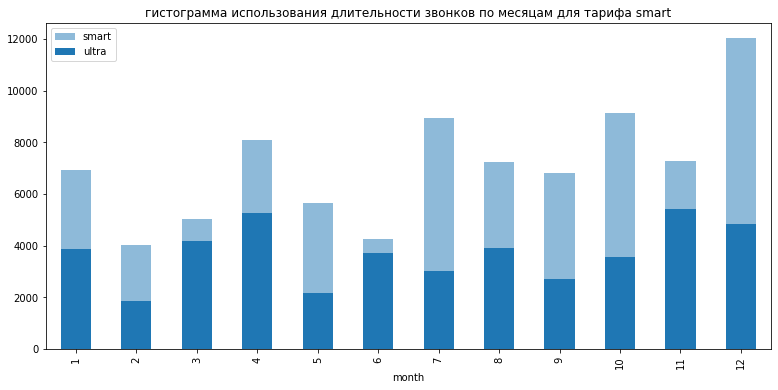

In [21]:
#гистограмма использования длительности звонков по месяцам для тарифа 'smart'
ax = tariff_smart.plot (y = 'duration', grid = True, figsize = (13, 6), style = 'o-', kind = 'bar', label = 'smart', alpha = 0.5)
#гистограмма использования длительности звонков по месяцам для тарифа 'ultra'
tariff_ultra.plot (y = 'duration', figsize = (13, 6), style = 'o-', kind = 'bar', label = 'ultra', ax = ax)
plt.title ('гистограмма использования длительности звонков по месяцам для тарифа smart')
plt.show()

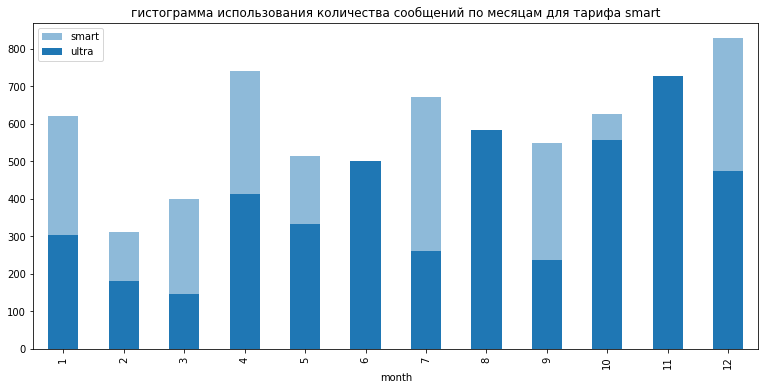

In [22]:
#гистограмма использования количества сообщений по месяцам для тарифа 'smart'
ax = tariff_smart.plot (y = 'message_date', grid = True, figsize = (13, 6), style = 'o-', kind = 'bar', label = 'smart', alpha = 0.5)
#гистограмма использования количества сообщений по месяцам для тарифа 'ultra'
tariff_ultra.plot (y = 'message_date', figsize = (13, 6), style = 'o-', kind = 'bar', label = 'ultra', ax = ax)
plt.title ('гистограмма использования количества сообщений по месяцам для тарифа smart')
plt.show()

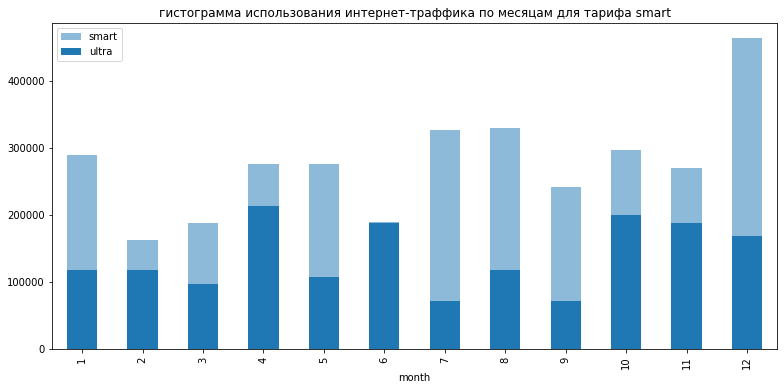

In [23]:
#гистограмма использования интернет-траффика по месяцам для тарифа 'smart'
ax = tariff_smart.plot (y = 'mb_used', grid = True, figsize = (13, 6), style = 'o-', kind = 'bar', label = 'smart', alpha = 0.5)
#гистограмма использования интернет-траффика по месяцам для тарифа 'ultra'
tariff_ultra.plot (y = 'mb_used', figsize = (13, 6), style = 'o-', kind = 'bar', label = 'ultra', ax = ax)
plt.title ('гистограмма использования интернет-траффика по месяцам для тарифа smart')
plt.show()

Из построенных гистограмм видно, что пользователи тарифа "смарт" используют больше минут разговоров, сообщений и интернет-траффика, чем пользователи тарифа "ультра" в каждом месяце (за некоторым исключением).

<a id="step_10"></a> 
<b>3.2. Посчитаем среднее количество, дисперсию и стандартное отклонение.</b>

In [24]:
#сделаем таблицу с интересующими нас значениями для пользователей тарифа 'smart'
mean_smart = (group_all
     .query ('tariff == "smart"')
     .pivot_table (index = 'month', values = ('duration', 'message_date', 'mb_used', 'total'), aggfunc = 'mean')
)

mean_smart.columns = ['mean_duration', 'mean_messages', 'mean_internet', 'mean_total']
#сделаем таблицу с интересующими нас значениями для пользователей тарифа 'ultra'
mean_ultra = (group_all
     .query ('tariff == "ultra"')
     .pivot_table (index = 'month', values = ('duration', 'message_date', 'mb_used', 'total'), aggfunc = 'mean')
)

mean_ultra.columns = ['mean_duration', 'mean_messages', 'mean_internet', 'mean_total']

In [25]:
#записываю в переменную всех пользователей Smart для подсчета дисперсии
smart_person = group_all.query ('tariff == "smart"')

#дисперсия звонков тарифа "смарт"
variance_smart_calls = smart_person.pivot_table (index = 'month', values = 'duration', aggfunc = np.var)

#дисперсия сообщений тарифа "смарт"
variance_smart_message = smart_person.pivot_table (index = 'month', values = 'message_date', aggfunc = np.var)

#дисперсия интернет-траффика тарифа "смарт"
variance_smart_internet = smart_person.pivot_table (index = 'month', values = 'mb_used', aggfunc = np.var)

variance_smart = variance_smart_calls.merge (variance_smart_message, on = 'month')
variance_smart = variance_smart.merge (variance_smart_internet, on = 'month')
variance_smart.columns = ['variance_calls', 'variance_message', 'variance_internet']

global_smart = mean_smart.merge (variance_smart, on = 'month')
display (global_smart)

#записываю в переменную всех пользователей Ultra для подсчета дисперсии
ultra_person = group_all.query ('tariff == "ultra"')

#дисперсия звонков тарифа "ультра"
variance_ultra_calls = ultra_person.pivot_table (index = 'month', values = 'duration', aggfunc = np.var)

#дисперсия сообщений тарифа "ультра"
variance_ultra_message = ultra_person.pivot_table (index = 'month', values = 'message_date', aggfunc = np.var)

#дисперсия интернет-траффика тарифа "ультра"
variance_ultra_internet = ultra_person.pivot_table (index = 'month', values = 'mb_used', aggfunc = np.var)

variance_ultra = variance_ultra_calls.merge (variance_ultra_message, on = 'month')
variance_ultra = variance_ultra.merge (variance_ultra_internet, on = 'month')
variance_ultra.columns = ['variance_calls', 'variance_message', 'variance_internet']

global_ultra = mean_ultra.merge (variance_ultra, on = 'month')
display (global_ultra)

,mean_duration,mean_messages,mean_internet,mean_total,variance_calls,variance_message,variance_internet
month,,,,,,,
1,203.852941,8524.441176,18.235294,703.676471,23787.341355,262.367201,4.162621e+07
2,168.125000,6799.708333,13.000000,556.375000,18421.679348,268.347826,2.076865e+07
3,265.578947,9917.210526,21.052632,690.052632,23606.701754,362.052632,2.712906e+07
4,231.314286,7896.657143,21.114286,572.914286,21152.398319,425.398319,1.793742e+07
5,195.103448,9505.413793,17.724138,738.310345,21778.167488,338.492611,4.863679e+07
6,185.869565,8228.000000,13.652174,570.391304,9904.209486,276.328063,2.451719e+07
7,241.108108,8815.783784,18.135135,652.702703,21725.932432,302.453453,3.156567e+07
8,213.117647,9687.029412,16.970588,614.058824,18373.622103,456.090018,2.450146e+07
9,262.076923,9309.846154,21.115385,622.730769,31820.153846,499.146154,2.835204e+07


,mean_duration,mean_messages,mean_internet,mean_total,variance_calls,variance_message,variance_internet
month,,,,,,,
1,428.111111,13153.555556,33.777778,1950.0,72769.361111,940.694444,4.722641e+07
2,124.933333,7825.933333,12.066667,1970.0,19125.495238,331.352381,8.792543e+07
3,322.615385,7417.846154,11.230769,1950.0,49596.256410,107.858974,3.271693e+07
4,293.166667,11849.666667,22.888889,1950.0,68667.558824,1014.104575,8.499787e+07
5,181.500000,8891.666667,27.666667,1950.0,40789.363636,632.242424,6.596449e+07
6,218.647059,11021.411765,29.470588,1950.0,35837.242647,727.389706,4.184689e+07
7,431.142857,10232.000000,37.285714,1950.0,98796.476190,732.571429,5.018871e+07
8,244.562500,7325.812500,36.437500,1950.0,56152.262500,1126.129167,1.987607e+07
9,299.777778,7983.222222,26.444444,1950.0,130272.444444,761.777778,4.733151e+07


In [26]:
#стандартное отклонение звонков тарифа "смарт"
sigma_smart_calls = global_smart.pivot_table (index = 'month', values = 'variance_calls', aggfunc = np.sqrt)

#дстандартное отклонение сообщений тарифа "смарт"
sigma_smart_message = global_smart.pivot_table (index = 'month', values = 'variance_message', aggfunc = np.sqrt)

#дстандартное отклонение интернет-траффика тарифа "смарт"
sigma_smart_internet = global_smart.pivot_table (index = 'month', values = 'variance_internet', aggfunc = np.sqrt)

sigma_smart = sigma_smart_calls.merge (sigma_smart_message, on = 'month')
sigma_smart = sigma_smart.merge (sigma_smart_internet, on = 'month')
sigma_smart.columns = ['sigma_calls', 'sigma_message', 'sigma_internet']

global_smart = global_smart.merge (sigma_smart, on = 'month')
display (global_smart)

#стандартное отклонение звонков тарифа "ультра"
sigma_ultra_calls = global_smart.pivot_table (index = 'month', values = 'variance_calls', aggfunc = np.sqrt)

#стандартное отклонение сообщений тарифа "ультра"
sigma_ultra_message = global_smart.pivot_table (index = 'month', values = 'variance_message', aggfunc = np.sqrt)

#стандартное отклонение интернет-траффика тарифа "ультра"
sigma_ultra_internet = global_smart.pivot_table (index = 'month', values = 'variance_internet', aggfunc = np.sqrt)

sigma_ultra = sigma_ultra_calls.merge (sigma_ultra_message, on = 'month')
sigma_ultra = sigma_ultra.merge (sigma_ultra_internet, on = 'month')
sigma_ultra.columns = ['sigma_calls', 'sigma_message', 'sigma_internet']

global_ultra = global_ultra.merge (sigma_ultra, on = 'month')
display (global_ultra)

,mean_duration,mean_messages,mean_internet,mean_total,variance_calls,variance_message,variance_internet,sigma_calls,sigma_message,sigma_internet
month,,,,,,,,,,
1,203.852941,8524.441176,18.235294,703.676471,23787.341355,262.367201,4.162621e+07,154.231454,16.197753,6451.837940
2,168.125000,6799.708333,13.000000,556.375000,18421.679348,268.347826,2.076865e+07,135.726487,16.381326,4557.263524
3,265.578947,9917.210526,21.052632,690.052632,23606.701754,362.052632,2.712906e+07,153.644726,19.027681,5208.556396
4,231.314286,7896.657143,21.114286,572.914286,21152.398319,425.398319,1.793742e+07,145.438641,20.625187,4235.258662
5,195.103448,9505.413793,17.724138,738.310345,21778.167488,338.492611,4.863679e+07,147.574278,18.398169,6974.008145
6,185.869565,8228.000000,13.652174,570.391304,9904.209486,276.328063,2.451719e+07,99.519895,16.623118,4951.483377
7,241.108108,8815.783784,18.135135,652.702703,21725.932432,302.453453,3.156567e+07,147.397193,17.391189,5618.333423
8,213.117647,9687.029412,16.970588,614.058824,18373.622103,456.090018,2.450146e+07,135.549335,21.356264,4949.894915
9,262.076923,9309.846154,21.115385,622.730769,31820.153846,499.146154,2.835204e+07,178.382045,22.341579,5324.663127


,mean_duration,mean_messages,mean_internet,mean_total,variance_calls,variance_message,variance_internet,sigma_calls,sigma_message,sigma_internet
month,,,,,,,,,,
1,428.111111,13153.555556,33.777778,1950.0,72769.361111,940.694444,4.722641e+07,154.231454,16.197753,6451.837940
2,124.933333,7825.933333,12.066667,1970.0,19125.495238,331.352381,8.792543e+07,135.726487,16.381326,4557.263524
3,322.615385,7417.846154,11.230769,1950.0,49596.256410,107.858974,3.271693e+07,153.644726,19.027681,5208.556396
4,293.166667,11849.666667,22.888889,1950.0,68667.558824,1014.104575,8.499787e+07,145.438641,20.625187,4235.258662
5,181.500000,8891.666667,27.666667,1950.0,40789.363636,632.242424,6.596449e+07,147.574278,18.398169,6974.008145
6,218.647059,11021.411765,29.470588,1950.0,35837.242647,727.389706,4.184689e+07,99.519895,16.623118,4951.483377
7,431.142857,10232.000000,37.285714,1950.0,98796.476190,732.571429,5.018871e+07,147.397193,17.391189,5618.333423
8,244.562500,7325.812500,36.437500,1950.0,56152.262500,1126.129167,1.987607e+07,135.549335,21.356264,4949.894915
9,299.777778,7983.222222,26.444444,1950.0,130272.444444,761.777778,4.733151e+07,178.382045,22.341579,5324.663127


<a id="step_11"></a> 
<b>3.3. Построим гистограммы.</b>

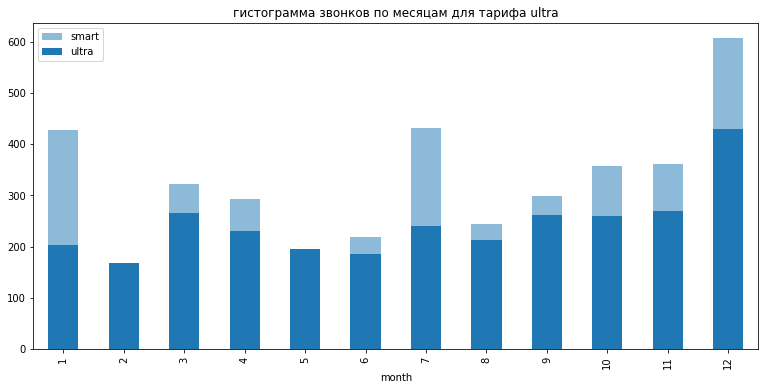

In [27]:
#гистограмма звонков по месяцам для тарифа 'ultra'
ax = global_ultra.plot (y = 'mean_duration', grid = True, figsize = (13, 6), style = 'o-', kind = 'bar', label = 'smart', alpha = 0.5)
#гистограмма звонков сообщений по месяцам для тарифа 'smart'
global_smart.plot (y = 'mean_duration', figsize = (13, 6), style = 'o-', kind = 'bar', label = 'ultra', ax = ax)
plt.title ('гистограмма звонков по месяцам для тарифа ultra')
plt.show()

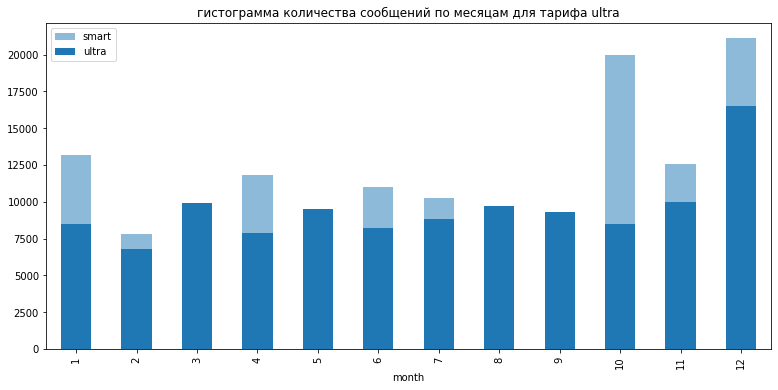

In [28]:
#гистограмма количества сообщений по месяцам для тарифа 'ultra'
ax = global_ultra.plot (y = 'mean_messages', grid = True, figsize = (13, 6), style = 'o-', kind = 'bar', label = 'smart', alpha = 0.5)
#гистограмма количества сообщений по месяцам для тарифа 'smart'
global_smart.plot (y = 'mean_messages', figsize = (13, 6), style = 'o-', kind = 'bar', label = 'ultra', ax = ax)
plt.title ('гистограмма количества сообщений по месяцам для тарифа ultra')
plt.show()

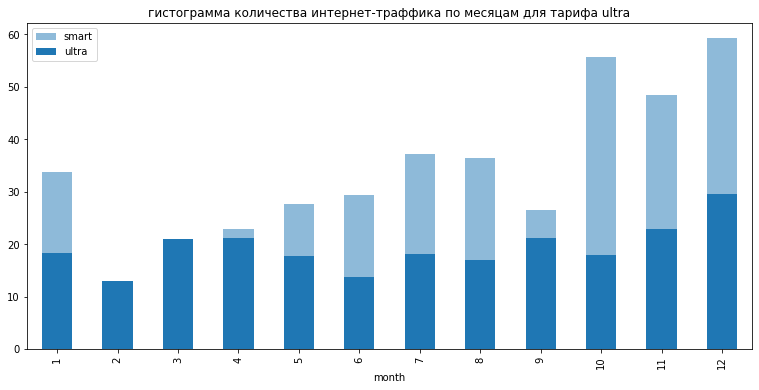

In [29]:
#гистограмма количества интернет-траффика по месяцам для тарифа 'ultra'
ax = global_ultra.plot (y = 'mean_internet', grid = True, figsize = (13, 6), style = 'o-', kind = 'bar', label = 'smart', alpha = 0.5)
#гистограмма количества интернет-траффика по месяцам для тарифа 'smart'
global_smart.plot (y = 'mean_internet', figsize = (13, 6), style = 'o-', kind = 'bar', label = 'ultra', ax = ax)
plt.title ('гистограмма количества интернет-траффика по месяцам для тарифа ultra')
plt.show()

,duration,mb_used,message_date,total
user_id,,,,
1001,430.0,18452.0,0.0,1150.0
1002,117.0,10871.0,4.0,550.0
1005,95.0,2730.0,7.0,550.0
1006,42.0,1395.0,0.0,550.0
1007,198.0,8031.0,11.0,550.0
1008,339.0,13236.0,56.0,568.0
1009,109.0,7359.0,2.0,550.0
1010,142.0,14480.0,0.0,550.0
1011,212.0,5900.0,4.0,550.0


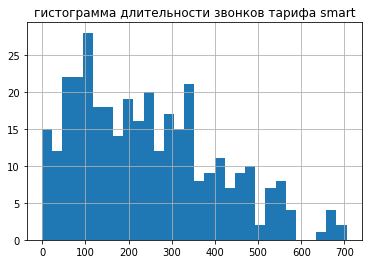

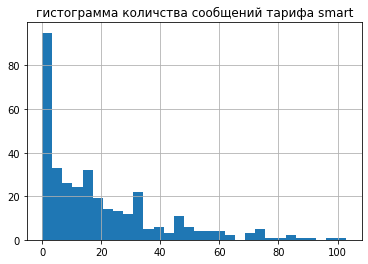

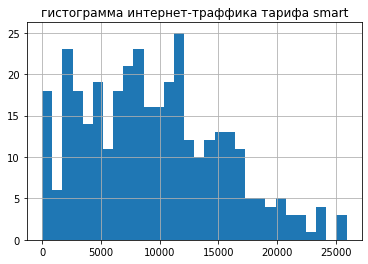

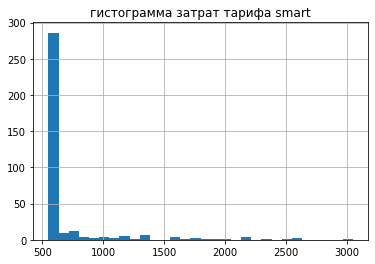

,duration,mb_used,message_date,total
user_id,,,,
1000,159.0,2256.0,22.0,1950.0
1003,380.0,8571.0,37.0,1950.0
1004,35.0,13415.0,95.0,1950.0
1013,369.0,9790.0,17.0,1950.0
1016,28.0,7388.0,39.0,1950.0
1018,636.0,5627.0,34.0,1950.0
1019,300.0,10281.0,21.0,1950.0
1021,90.0,4358.0,13.0,1950.0
1024,79.0,3313.0,0.0,1950.0


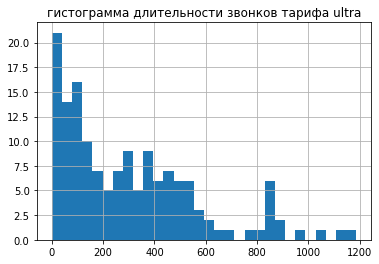

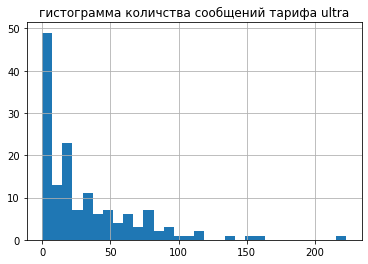

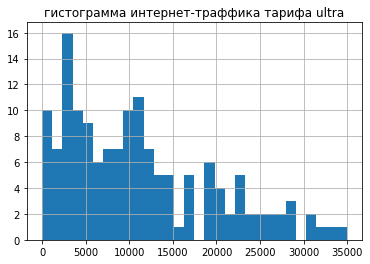

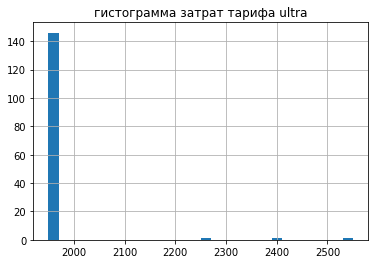

In [30]:
smart_hist = (group_all
              .query ('tariff == "smart"')
              .pivot_table (index = 'user_id', values = ['duration', 'message_date', 'mb_used', 'total'], aggfunc = 'mean')
)
display (smart_hist.head (10))
plt.title ('гистограмма длительности звонков тарифа smart')
smart_hist ['duration'].hist (bins = 30)
plt.show()
plt.title ('гистограмма количства сообщений тарифа smart')
smart_hist ['message_date'].hist (bins = 30)
plt.show()
plt.title ('гистограмма интернет-траффика тарифа smart')
smart_hist ['mb_used'].hist (bins = 30)
plt.show()
plt.title ('гистограмма затрат тарифа smart')
smart_hist ['total'].hist (bins = 30)
plt.show()

ultra_hist = (group_all
              .query ('tariff == "ultra"')
              .pivot_table (index = 'user_id', values = ['duration', 'message_date', 'mb_used', 'total'], aggfunc = 'mean')
)
display (ultra_hist.head (10))
plt.title ('гистограмма длительности звонков тарифа ultra')
ultra_hist ['duration'].hist (bins = 30)
plt.show()
plt.title ('гистограмма количства сообщений тарифа ultra')
ultra_hist ['message_date'].hist (bins = 30)
plt.show()
plt.title ('гистограмма интернет-траффика тарифа ultra')
ultra_hist ['mb_used'].hist (bins = 30)
plt.show()
plt.title ('гистограмма затрат тарифа ultra')
ultra_hist ['total'].hist (bins = 30)
plt.show()

<a id="step_12"></a> 
<b>3.4. Опишием распределения.</b>

Тариф "smart":

Пользователи в среднем разговаривают около 100 минут в месяц, реже от 100 до 350 минут.

Пользователи в среднем отправляют около 1 смс в месяц, реже от 1 до 15 смс.

Пользователи в среднем используют около 10-12 Гб интернет-траффика в месяц.

Пользователи в среднем тратят около 550-600 рублей в месяц.

Тариф "ultra":

Пользователи в среднем разговаривают около 1 минуты в месяц, реже от 1 до 100 минут.

Пользователи в среднем отправляют от 1 до 10 смс в месяц, реже 20.

Пользователи в среднем используют около 3 Гб интернет-траффика в месяц, реже 11 Гб.

Пользователи в среднем тратят около 2 000 рублей в месяц

<b>В целом, пользователи тарифа "Смарт" разговаривают, отправляют смс и используют интернет-траффик больше пользователей тарифа "Ультра".</b>

<a id="step_13"></a> 
<b> 4. Проверка гипотез </b>
  
<b>4.1. средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.</b>

Примем за нулевую гипотезу предположение о том, что средняя выручка пользователей тарифов «Ультра» и «Смарт» не различаются, а именно средние по нашем выборкам равны или различаются не значительно.

За альтернативную гипотезу примем предположение о различии наших выборок, следовательно: средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.

In [31]:
#сделаем таблицу с интересующими нас значениями для пользователей тарифа 'smart'
tariff_smart_now = (group_all
     .query ('tariff == "smart"')
     .pivot_table (index = ['user_id', 'month'], values = 'total', aggfunc = 'sum')
)                

tariff_smart_now.columns = ['sum_total']

#сделаем таблицу с интересующими нас значениями для пользователей тарифа 'ultra'
tariff_ultra_now = (group_all
     .query ('tariff == "ultra"')
     .pivot_table (index = ['user_id', 'month'], values = 'total', aggfunc = 'sum')
)

tariff_ultra_now.columns = ['sum_total']

#считаем дисперсию по сумме затрат тарифа 'smart'
print ('Дисперсия по тарифу смарт:', np.var (tariff_smart_now ['sum_total']))

#считаем дисперсию по сумме затрат тарифа 'ultra'
print ('Дисперсия по тарифу ультра:', np.var (tariff_ultra_now ['sum_total']))

#принимаем критический уровень статистической значимости в 5%
alpha = 0.05

#проверим, равны ли средние двух генеральных совокупностей
results = st.ttest_ind (tariff_smart_now ['sum_total'], tariff_ultra_now ['sum_total'], equal_var = False) 

display ('p-значение: ', results.pvalue)
      
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Дисперсия по тарифу смарт: 138882.45322684065
Дисперсия по тарифу ультра: 4297.103734066032


'p-значение: '

2.5527514135708084e-206

Отвергаем нулевую гипотезу


In [76]:
group_all.loc[group_all['tariff'] == 'smart'].shape

(351, 13)

In [77]:
final_df_test.loc[final_df_test['tariff_test'] == 'smart'].shape

(2230, 31)

Т.к., при проверке гипотезы о равенстве средних двух генеральлных совокупностей мы не подтвердили данную гипотезу, делаем вывод о том, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

<a id="step_14"></a> 
<b>4.2. средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.</b>

In [32]:
#сделаем таблицу с интересующими нас значениями для пользователей Москвовского региона
moscow_users = (group_all
     .query ('city == "Москва"')
     .pivot_table (index = 'month', values = ('duration', 'message_date', 'mb_used', 'total'), aggfunc = 'mean')
)

moscow_users.columns = ['mean_duration', 'mean_messages', 'mean_internet', 'mean_total']

#сделаем таблицу с интересующими нас значениями для пользователей остальных регионов
other_users = (group_all
     .query ('city != "Москва"')
     .pivot_table (index = 'month', values = ('duration', 'message_date', 'mb_used', 'total'), aggfunc = 'mean')
)

other_users.columns = ['mean_duration', 'mean_messages', 'mean_internet', 'mean_total']

#считаем дисперсию по сумме затрат пользователей Москвовского региона
print ('Дисперсия по сумме затрат пользователей Москвовского региона:', np.var (moscow_users ['mean_total']))

#считаем дисперсию по сумме затрат пользователей остальных регионов
print ('Дисперсия по сумме затрат пользователей остальных регионов:', np.var (other_users ['mean_total']))

#принимаем критический уровень статистической значимости в 5%
alpha = 0.05

#проверим, равны ли средние двух генеральных совокупностей
results = st.ttest_ind (moscow_users ['mean_total'], other_users ['mean_total'], equal_var = True) 

display ('p-значение: ', results.pvalue)
      
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Дисперсия по сумме затрат пользователей Москвовского региона: 110642.06225206907
Дисперсия по сумме затрат пользователей остальных регионов: 84228.31742727962


'p-значение: '

8.990067052355644e-05

Отвергаем нулевую гипотезу


Т.к., при проверке гипотезы о равенстве средних двух генеральлных совокупностей мы подтвердили данную гипотезу, делаем вывод о том, что средняя выручка пользователей Московского региона и пользователей остальных регионов не различаются

<a id="step_15"></a> 
<b>4.3. Пояснение как я формулировал нулевую и альтернативную гипотезы.</b>

При проверке гипотезы, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются, принял за нулевую гипотезу, что средние двух генеральлных совокупностей равны.

Получил отверждение данной гипотезы.

В связи с этим сделан вывод о том, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.

При проверке гипотезы значение equal_var присвоил равное 'False', т.к. диспервии сильно отличаются.

При проверке гипотезы, что средняя выручка пользователей Московского региона и пользователей остальных регионов не различаются, принял за нулевую гипотезу, что средние двух генеральлных совокупностей равны.

Получил подтверждение данной гипотезы.

В связи с этим сделан вывод о том, что средняя выручка пользователей Московского региона и пользователей остальных регионов не различаются.

При проверке гипотезы значение equal_var присвоил равное 'False', т.к. диспервии сильно отличаются.

<a id="step_16"></a> 
<b>4.4. Пояснение какой критерий использовали для проверки гипотез и почему.</b>

При проверке гипотез мы использовали t-критерии Стьюдента, т.к. критерии значимости, которые служат для проверки гипотез о параметрах распределений (чаще всего нормального), а они у нас и имеют место быть

<a id="step_17"></a> 
<b>5.Общий вывод </b>

В процессе выполнения данного проекта было выполнено:
    - изучена общая информация о предоставленных для работы данных в файлах;
    - приведены данные в файлах к нужным нам типам;
    - посчитано для каждого пользователя количество сделанных звонков и израсходованных минут разговора по месяцам;
    - посчитано для каждого пользователя количество отправленных сообщений по месяцам;
    - посчитано для каждого пользователя объем израсходованного интернет-трафика по месяцам;
    - посчитано для каждого пользователя помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану);
    - описаны поведения клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитано среднее количество, дисперсию и стандартное отклонение. Построены гистограммы. Описаны распределения;
    - проверена гипотеза о том, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
    - проверена гипотеза о том, что средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Из построенных гистограмм видно, что пользователи тарифа "смарт" используют больше минут разговоров, сообщений и интернет-траффика, чем пользователи тарифа "ультра" в каждом месяце (за некоторым исключением).

Тариф "smart":
Пользователи в среднем разговаривают около 100 минут в месяц, реже от 100 до 350 минут.
Пользователи в среднем отправляют около 1 смс в месяц, реже от 1 до 15 смс.
Пользователи в среднем используют около 10-12 Гб интернет-траффика в месяц.
Пользователи в среднем тратят около 550-600 рублей в месяц.

Тариф "ultra":
Пользователи в среднем разговаривают около 1 минуты в месяц, реже от 1 до 100 минут.
Пользователи в среднем отправляют от 1 до 10 смс в месяц, реже 20.
Пользователи в среднем используют около 3 Гб интернет-траффика в месяц, реже 11 Гб.
Пользователи в среднем тратят около 2 000 рублей в месяц

Т.к., при проверке гипотезы о равенстве средних двух генеральлных совокупностей мы не подтвердили данную гипотезу, делаем вывод о том, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

Т.к., при проверке гипотезы о равенстве средних двух генеральлных совокупностей мы подтвердили данную гипотезу, делаем вывод о том, что средняя выручка пользователей Московского региона и пользователей остальных регионов не различаются

При проверке гипотезы, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются, принял за нулевую гипотезу, что средние двух генеральлных совокупностей равны.

Получил отверждение данной гипотезы.

В связи с этим сделан вывод о том, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.

При проверке гипотезы значение equal_var присвоил равное 'False', т.к. диспервии сильно отличаются.

При проверке гипотезы, что средняя выручка пользователей Московского региона и пользователей остальных регионов не различаются, принял за нулевую гипотезу, что средние двух генеральлных совокупностей равны.

Получил подтверждение данной гипотезы.

В связи с этим сделан вывод о том, что средняя выручка пользователей Московского региона и пользователей остальных регионов не различаются.

При проверке гипотезы значение equal_var присвоил равное 'False', т.к. диспервии сильно отличаются.

При проверке гипотез мы использовали t-критерии Стьюдента, т.к. критерии значимости, которые служат для проверки гипотез о параметрах распределений (чаще всего нормального), а они у нас и имеют место быть